In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score


In [84]:
# Leer los datos
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Describir cada columna
df.describe()

# Renombrar las columnas para facilitar su uso
#df.columns = ['Codigo_Postal', 'Año_Modelo', 'Rango_Electrico', 'PVPR', 'Distrito_Legal', ]


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,173528.000000,173533.000000,173532.000000,173532.000000,173157.000000,1.735330e+05,1.735280e+05
mean,98174.746099,2020.435352,60.148002,1113.254472,29.146670,2.188134e+08,5.297739e+10
std,2411.109685,2.994442,92.644038,8513.543524,14.871778,7.658800e+07,1.567028e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.801662e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.271021e+08,5.303303e+10
75%,98370.000000,2023.000000,83.000000,0.000000,42.000000,2.530049e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [85]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [86]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [87]:
# Renombrar las columnas para facilitar su uso
df.columns = ['Matricula', 'Condado', 'Ciudad', 'Estado', 'Codigo_Postal', 'Año_Modelo',
                'Marca', 'Modelo', 'Tipo_Vehiculo_Electrico', 'Elegibilidad_CAFV',
                'Autonomia_Electrica', 'PVPR', 'Distrito_Legislativo', 
                'ID_Vehiculo_DOL', 'Ubicación_Vehiculo', 'Servicio_Electrico', 
                'Distrito_Censal_2020']
df.head()

,Matricula,Condado,Ciudad,Estado,Codigo_Postal,Año_Modelo,Marca,Modelo,Tipo_Vehiculo_Electrico,Elegibilidad_CAFV,Autonomia_Electrica,PVPR,Distrito_Legislativo,ID_Vehiculo_DOL,Ubicación_Vehiculo,Servicio_Electrico,Distrito_Censal_2020
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,15.0,206822717,POINT (-120.26317 46.40556),PACIFICORP,5.307700e+10
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,21.0,137721636,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0,26.0,197718468,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,40.0,256274308,POINT (-122.440636 48.5613885),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,2.0,259176578,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10


In [88]:
#Identificar columnas de un solo valor
df.nunique()

Matricula                   10571
Condado                       193
Ciudad                        710
Estado                         46
Codigo_Postal                 847
Año_Modelo                     22
Marca                          40
Modelo                        139
Tipo_Vehiculo_Electrico         2
Elegibilidad_CAFV               3
Autonomia_Electrica           102
PVPR                           31
Distrito_Legislativo           49
ID_Vehiculo_DOL            173533
Ubicación_Vehiculo            846
Servicio_Electrico             76
Distrito_Censal_2020         2103
dtype: int64

In [89]:
#ver columnas de tipo numero
df.select_dtypes(include=[np.number]).columns
#calcular varianza de estas columnas
df.select_dtypes(include=[np.number]).var()

Codigo_Postal           5.813450e+06
Año_Modelo              8.966680e+00
Autonomia_Electrica     8.582918e+03
PVPR                    7.248042e+07
Distrito_Legislativo    2.211698e+02
ID_Vehiculo_DOL         5.865722e+15
Distrito_Censal_2020    2.455576e+18
dtype: float64

In [90]:
df = df.drop(['Distrito_Legislativo', 'Distrito_Censal_2020','Matricula','ID_Vehiculo_DOL','Ubicación_Vehiculo','Servicio_Electrico'], axis=1)
df.head()

,Condado,Ciudad,Estado,Codigo_Postal,Año_Modelo,Marca,Modelo,Tipo_Vehiculo_Electrico,Elegibilidad_CAFV,Autonomia_Electrica,PVPR
0,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0
1,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0
2,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38.0,0.0
3,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0
4,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0


In [91]:
#Eliminar datos duplicados
df = df.drop_duplicates()
#check missing values
df.isnull().sum()

Condado                    5
Ciudad                     5
Estado                     0
Codigo_Postal              5
Año_Modelo                 0
Marca                      0
Modelo                     0
Tipo_Vehiculo_Electrico    0
Elegibilidad_CAFV          0
Autonomia_Electrica        1
PVPR                       1
dtype: int64

In [92]:
#Eliminar datos faltantes
df = df.dropna()

In [93]:
#outliers
df.describe()

,Codigo_Postal,Año_Modelo,Autonomia_Electrica,PVPR
count,48402.000000,48402.000000,48402.000000,48402.000000
mean,98056.066320,2019.774038,61.578984,2129.553118
std,4535.146543,3.288368,86.816748,11887.206860
min,1545.000000,1997.000000,0.000000,0.000000
25%,98087.000000,2018.000000,0.000000,0.000000
50%,98260.000000,2021.000000,25.000000,0.000000
75%,98516.000000,2023.000000,81.000000,0.000000
max,99577.000000,2024.000000,337.000000,845000.000000


<Axes: xlabel='Autonomia_Electrica'>

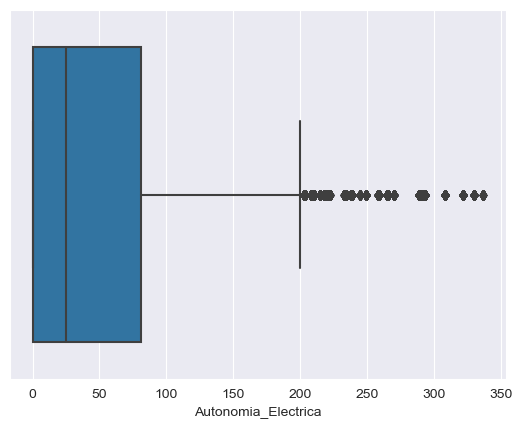

In [94]:
#graficar outliers
sns.boxplot(x=df['Autonomia_Electrica'])

<Axes: xlabel='PVPR'>

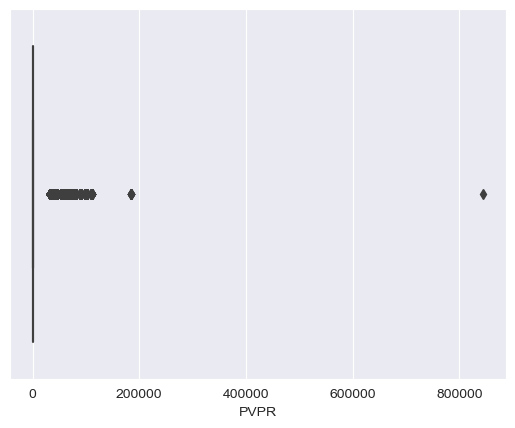

In [95]:
sns.boxplot(x=df['PVPR'])

In [96]:
#eliminar valores de autonomia electrica = 0
df = df[df['Autonomia_Electrica'] > 0]
df = df[df['PVPR'] > 0]

<Axes: xlabel='Autonomia_Electrica'>

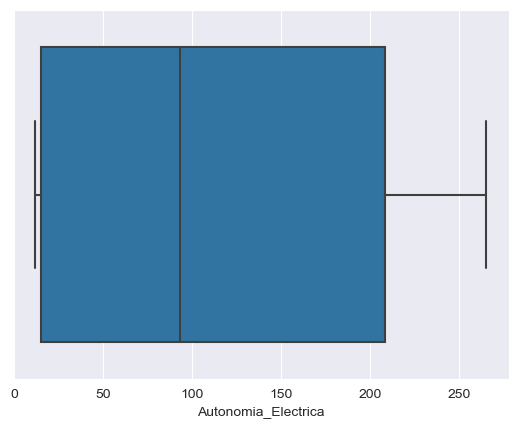

In [97]:
#graficar outliers
sns.boxplot(x=df['Autonomia_Electrica'])

<Axes: xlabel='PVPR'>

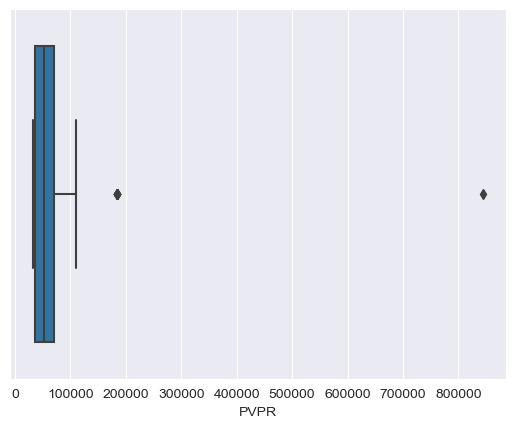

In [98]:
sns.boxplot(x=df['PVPR'])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863 entries, 23 to 173502
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Condado                  1863 non-null   object 
 1   Ciudad                   1863 non-null   object 
 2   Estado                   1863 non-null   object 
 3   Codigo_Postal            1863 non-null   float64
 4   Año_Modelo               1863 non-null   int64  
 5   Marca                    1863 non-null   object 
 6   Modelo                   1863 non-null   object 
 7   Tipo_Vehiculo_Electrico  1863 non-null   object 
 8   Elegibilidad_CAFV        1863 non-null   object 
 9   Autonomia_Electrica      1863 non-null   float64
 10  PVPR                     1863 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 174.7+ KB


In [100]:
df['Autonomia_Electrica'] = df['Autonomia_Electrica'].astype('int')
df['PVPR'] = df['PVPR'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863 entries, 23 to 173502
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Condado                  1863 non-null   object 
 1   Ciudad                   1863 non-null   object 
 2   Estado                   1863 non-null   object 
 3   Codigo_Postal            1863 non-null   float64
 4   Año_Modelo               1863 non-null   int64  
 5   Marca                    1863 non-null   object 
 6   Modelo                   1863 non-null   object 
 7   Tipo_Vehiculo_Electrico  1863 non-null   object 
 8   Elegibilidad_CAFV        1863 non-null   object 
 9   Autonomia_Electrica      1863 non-null   int64  
 10  PVPR                     1863 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 174.7+ KB


In [101]:
# Calcular el IQR solo para 'Autonomia_Electrica'
Q1_AE = df['Autonomia_Electrica'].quantile(0.25)
Q3_AE = df['Autonomia_Electrica'].quantile(0.75)
IQR_AE = Q3_AE - Q1_AE

# Filtrar outliers en 'Autonomia_Electrica'
mask_AE = ~((df['Autonomia_Electrica'] < (Q1_AE - 1.5 * IQR_AE)) | (df['Autonomia_Electrica'] > (Q3_AE + 1.5 * IQR_AE)))

# Calcular el IQR solo para 'PVPR'
Q1_PVPR = df['PVPR'].quantile(0.25)
Q3_PVPR = df['PVPR'].quantile(0.75)
IQR_PVPR = Q3_PVPR - Q1_PVPR

# Filtrar outliers en 'PVPR'
mask_PVPR = ~((df['PVPR'] < (Q1_PVPR - 1.5 * IQR_PVPR)) | (df['PVPR'] > (Q3_PVPR + 1.5 * IQR_PVPR)))

# Aplicar ambos filtros al DataFrame
df = df[mask_AE & mask_PVPR]

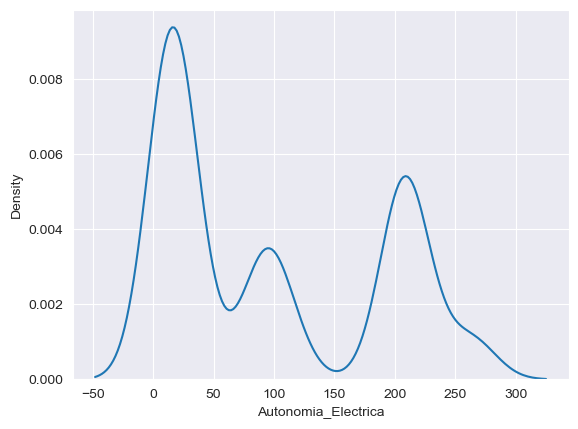

In [108]:
sns.kdeplot(data=df['Autonomia_Electrica'])
plt.show()

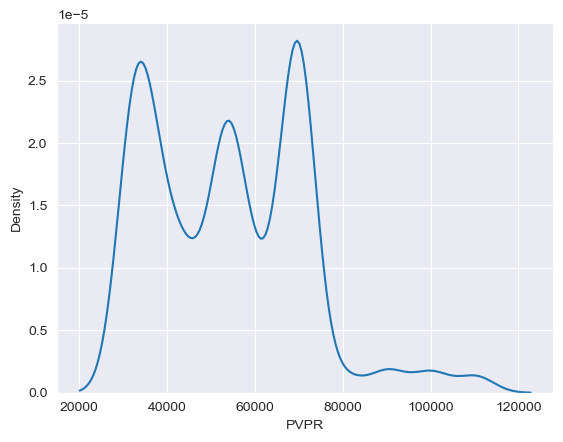

In [109]:
sns.kdeplot(data=df['PVPR'])
plt.show()

In [111]:
#value conunt de pvpr
df['PVPR'].value_counts()

PVPR
69900     480
31950     179
52900     152
54950      99
32250      99
59900      86
36900      81
39995      77
44100      68
45600      63
33950      60
64950      54
52650      53
34995      51
36800      47
55700      41
53400      30
81100      19
98950      19
90700      18
110950     17
102000     13
75095      13
43700      10
89100       9
109000      7
91250       5
32995       3
Name: count, dtype: int64

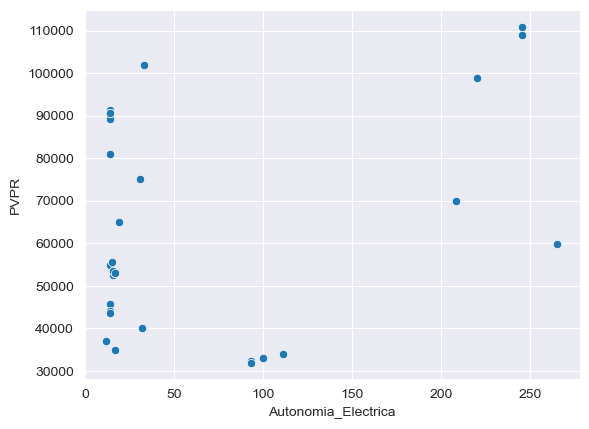

In [110]:
# Graficar la relación entre 'Autonomia_Electrica' y 'PVPR'
sns.scatterplot(data=df, x='Autonomia_Electrica', y='PVPR')

# Mostrar la gráfica
plt.show()